# Price predict
The aim of this notebook is to make price predict with LightGBM and find the most important features in price predict

In [1]:
import numpy as np
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import lightgbm as lgb

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

### Gathering the data

In [2]:
data = pd.read_csv('Seattle_Airbnb_Open_Data\listings_data.csv')
data.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,zipcode,is_location_exact,accommodates,...,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,log_price
0,2,0.96,1.0,0,0.697236,1,1,19,1,4,...,0,0,0,0,0,0,1,1,0,4.454347
1,1,0.98,1.0,1,0.782672,1,1,19,1,4,...,0,0,0,0,0,0,1,0,1,5.017280
2,96,0.00,0.0,0,0.479421,1,1,19,1,3,...,0,0,0,0,0,0,1,0,0,4.615121
3,1,1.00,0.0,0,0.626978,1,1,19,1,6,...,0,0,0,0,0,0,1,0,1,6.111467
4,96,0.00,0.0,0,0.479421,1,1,19,1,2,...,0,1,0,0,0,0,1,0,1,4.795791


In [3]:
y = data['log_price']
X = data.drop('log_price', axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print('The shape of training data:', X_train.shape)
print('The shape of testing data:', X_test.shape)

The shape of training data: (3230, 193)
The shape of testing data: (570, 193)


Define the KFold(K=5)

In [5]:
n_folds = 5

def rmse_cv(model):
    """
    Caculate RMSE of the model with kfold crossing validation.
    
    INPUT:
        model - the model we built.
        
    OUTPUT:
        rmse - RMSE of the model.
    """
    
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return(rmse)

def rmse(y, y_preds):
    """
    Caculate RMSE about real y and predicted y.
    
    INPUT:
        y - real value of y.
        y_preds - predicted y.
        
    RETURN:
        RMSE about real y and predicted y.
    """
    return np.sqrt(mean_squared_error(y, y_preds))

### Modeling: Adjust parameters of LightGBM

* **n_estimators**

In [6]:
params = {'learning_rate': 0.1,
      'n_estimators': 300, 
      'max_depth': 5,
      'num_leaves': 40,
      'subsample': 0.6,
      'colsample_bytree': 0.7,
      'min_child_weight': 0.001,
      'min_child_samples': 10,
      'random_state': 42,
      'reg_alpha': 0,
      'reg_lambda': 1}
cv_params = {'n_estimators': [10, 20, 50, 80, 100, 200, 300, 500]}
lgbr = lgb.LGBMRegressor(**params)
grid_lgbr = GridSearchCV(estimator=lgbr, param_grid=cv_params, scoring='neg_mean_squared_error', cv=n_folds, verbose=1)
grid_lgbr.fit(np.array(X_train), np.array(y_train))
result = grid_lgbr.cv_results_
print('The best value of the parameter：{}'.format(grid_lgbr.best_params_))
print('Score of the best model:{}'.format(grid_lgbr.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best value of the parameter：{'n_estimators': 200}
Score of the best model:-0.07754122880165008


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.9s finished


In [7]:
params = {'learning_rate': 0.1,
      'n_estimators': 200, 
      'max_depth': 5,
      'num_leaves': 40,
      'subsample': 0.6,
      'colsample_bytree': 0.7,
      'min_child_weight': 0.001,
      'min_child_samples': 10,
      'random_state': 42,
      'reg_alpha': 0,
      'reg_lambda': 1}
cv_params = {'n_estimators': [120, 140, 160, 180, 200, 220, 240, 260, 280]}
lgbr = lgb.LGBMRegressor(**params)
grid_lgbr = GridSearchCV(estimator=lgbr, param_grid=cv_params, scoring='neg_mean_squared_error', cv=n_folds, verbose=1)
grid_lgbr.fit(np.array(X_train), np.array(y_train))
result = grid_lgbr.cv_results_
print('The best value of the parameter：{}'.format(grid_lgbr.best_params_))
print('Score of the best model:{}'.format(grid_lgbr.best_score_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   10.9s finished


The best value of the parameter：{'n_estimators': 200}
Score of the best model:-0.07754122880165008


* **max_depth** and **num_leaves**

In [8]:
params = {'learning_rate': 0.1,
      'n_estimators': 200, 
      'max_depth': 5,
      'num_leaves': 40,
      'subsample': 0.6,
      'colsample_bytree': 0.7,
      'min_child_weight': 0.001,
      'min_child_samples': 10,
      'random_state': 42,
      'reg_alpha': 0,
      'reg_lambda': 1}
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'num_leaves': [5, 10, 20, 30, 40]}
lgbr = lgb.LGBMRegressor(**params)
grid_lgbr = GridSearchCV(estimator=lgbr, param_grid=cv_params, scoring='neg_mean_squared_error', cv=n_folds, verbose=1)
grid_lgbr.fit(np.array(X_train), np.array(y_train))
result = grid_lgbr.cv_results_
print('The best value of the parameter：{}'.format(grid_lgbr.best_params_))
print('Score of the best model:{}'.format(grid_lgbr.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   47.5s finished


The best value of the parameter：{'max_depth': 5, 'num_leaves': 10}
Score of the best model:-0.0770185086756642


* **subsample** and **colsample_bytree**

In [9]:
params = {'learning_rate': 0.1,
      'n_estimators': 200, 
      'max_depth': 5,
      'num_leaves': 10,
      'subsample': 0.6,
      'colsample_bytree': 0.7,
      'min_child_weight': 0.001,
      'min_child_samples': 10,
      'random_state': 42,
      'reg_alpha': 0,
      'reg_lambda': 1}
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]}
lgbr = lgb.LGBMRegressor(**params)
grid_lgbr = GridSearchCV(estimator=lgbr, param_grid=cv_params, scoring='neg_mean_squared_error', cv=n_folds, verbose=1)
grid_lgbr.fit(np.array(X_train), np.array(y_train))
result = grid_lgbr.cv_results_
print('The best value of the parameter：{}'.format(grid_lgbr.best_params_))
print('Score of the best model:{}'.format(grid_lgbr.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   25.4s finished


The best value of the parameter：{'colsample_bytree': 0.9, 'subsample': 0.6}
Score of the best model:-0.0769912397454625


* **min_child_weight** and **min_child_samples**

In [10]:
params = {'learning_rate': 0.1,
      'n_estimators': 200, 
      'max_depth': 5,
      'num_leaves': 10,
      'subsample': 0.6,
      'colsample_bytree': 0.9,
      'min_child_weight': 0.001,
      'min_child_samples': 10,
      'random_state': 42,
      'reg_alpha': 0,
      'reg_lambda': 1}
cv_params = {'min_child_weight': [0.001, 0.002, 0.005, 0.008, 0.01, 0.02, 0.05], 'min_child_samples': [5, 10, 15, 20, 21, 25]}
lgbr = lgb.LGBMRegressor(**params)
grid_lgbr = GridSearchCV(estimator=lgbr, param_grid=cv_params, scoring='neg_mean_squared_error', cv=n_folds, verbose=1)
grid_lgbr.fit(np.array(X_train), np.array(y_train))
result = grid_lgbr.cv_results_
print('The best value of the parameter：{}'.format(grid_lgbr.best_params_))
print('Score of the best model:{}'.format(grid_lgbr.best_score_))

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   42.8s finished


The best value of the parameter：{'min_child_samples': 10, 'min_child_weight': 0.001}
Score of the best model:-0.0769912397454625


* **reg_alpha** and **reg_lambda**

In [11]:
params = {'learning_rate': 0.1,
      'n_estimators': 200, 
      'max_depth': 5,
      'num_leaves': 10,
      'subsample': 0.6,
      'colsample_bytree': 0.9,
      'min_child_weight': 0.001,
      'min_child_samples': 10,
      'random_state': 42,
      'reg_alpha': 0,
      'reg_lambda': 1}
cv_params = {'reg_alpha': [0, 0.05, 0.1, 0.5, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 0.5, 1, 2, 3]}
lgbr = lgb.LGBMRegressor(**params)
grid_lgbr = GridSearchCV(estimator=lgbr, param_grid=cv_params, scoring='neg_mean_squared_error', cv=n_folds, verbose=1)
grid_lgbr.fit(np.array(X_train), np.array(y_train))
result = grid_lgbr.cv_results_
print('The best value of the parameter：{}'.format(grid_lgbr.best_params_))
print('Score of the best model:{}'.format(grid_lgbr.best_score_))

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best value of the parameter：{'reg_alpha': 0, 'reg_lambda': 1}
Score of the best model:-0.0769912397454625


[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   48.9s finished


* **learning_rate**

In [12]:
params = {'learning_rate': 0.01,
      'n_estimators': 2000, 
      'max_depth': 5,
      'num_leaves': 10,
      'subsample': 0.6,
      'colsample_bytree': 0.9,
      'min_child_weight': 0.001,
      'min_child_samples': 10,
      'random_state': 42,
      'reg_alpha': 0,
      'reg_lambda': 1}
cv_params = {'learning_rate': [0.005, 0.008, 0.01, 0.015, 0.02, 0.05]}
lgbr = lgb.LGBMRegressor(**params)
grid_lgbr = GridSearchCV(estimator=lgbr, param_grid=cv_params, scoring='neg_mean_squared_error', cv=n_folds, verbose=1)
grid_lgbr.fit(np.array(X_train), np.array(y_train))
result = grid_lgbr.cv_results_
print('The best value of the parameter：{}'.format(grid_lgbr.best_params_))
print('Score of the best model:{}'.format(grid_lgbr.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   51.5s finished


The best value of the parameter：{'learning_rate': 0.015}
Score of the best model:-0.07594715854107456


In [13]:
params = {'learning_rate': 0.015,
      'n_estimators': 2000, 
      'max_depth': 5,
      'num_leaves': 10,
      'subsample': 0.6,
      'colsample_bytree': 0.9,
      'min_child_weight': 0.001,
      'min_child_samples': 10,
      'random_state': 42,
      'reg_alpha': 0,
      'reg_lambda': 1}
cv_params = {'learning_rate': [0.012, 0.013, 0.014, 0.015, 0.016, 0.018]}
lgbr = lgb.LGBMRegressor(**params)
grid_lgbr = GridSearchCV(estimator=lgbr, param_grid=cv_params, scoring='neg_mean_squared_error', cv=n_folds, verbose=1)
grid_lgbr.fit(np.array(X_train), np.array(y_train))
result = grid_lgbr.cv_results_
print('The best value of the parameter：{}'.format(grid_lgbr.best_params_))
print('Score of the best model:{}'.format(grid_lgbr.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   46.8s finished


The best value of the parameter：{'learning_rate': 0.015}
Score of the best model:-0.07594715854107456


### Evaluate model

In [14]:
params = {'learning_rate': 0.015,
      'n_estimators': 2000, 
      'max_depth': 5,
      'num_leaves': 10,
      'subsample': 0.6,
      'colsample_bytree': 0.9,
      'min_child_weight': 0.001,
      'min_child_samples': 10,
      'random_state': 42,
      'reg_alpha': 0,
      'reg_lambda': 1}
lgbr = lgb.LGBMRegressor(**params)
score = rmse_cv(lgbr)
print('RMSE of LightGBM: {}({})'.format(score.mean(), score.std()))

RMSE of LightGBM: 0.2783765068185752(0.008089757379601282)


In [15]:
lgbr_trained = lgbr.fit(np.array(X_train), np.array(y_train))

y_train_preds = lgbr.predict(np.array(X_train))
train_rmse = rmse(y_train, y_train_preds)
train_r2 = r2_score(y_train, y_train_preds)

y_test_preds = lgbr.predict(np.array(X_test))
test_rmse = rmse(y_test, y_test_preds)
test_r2 = r2_score(y_test, y_test_preds)

print('RMSE on training data: {}'.format(train_rmse))
print('r2 score on training data: {}'.format(train_r2))
print('RMSE on testing data: {}'.format(test_rmse))
print('r2 score on testing data: {}'.format(test_r2))

RMSE on training data: 0.18740190882620614
r2 score on training data: 0.8805452968302842
RMSE on testing data: 0.2825170935439663
r2 score on testing data: 0.7461386665908952


### Question: What features influence the price most?

#### Data visualization

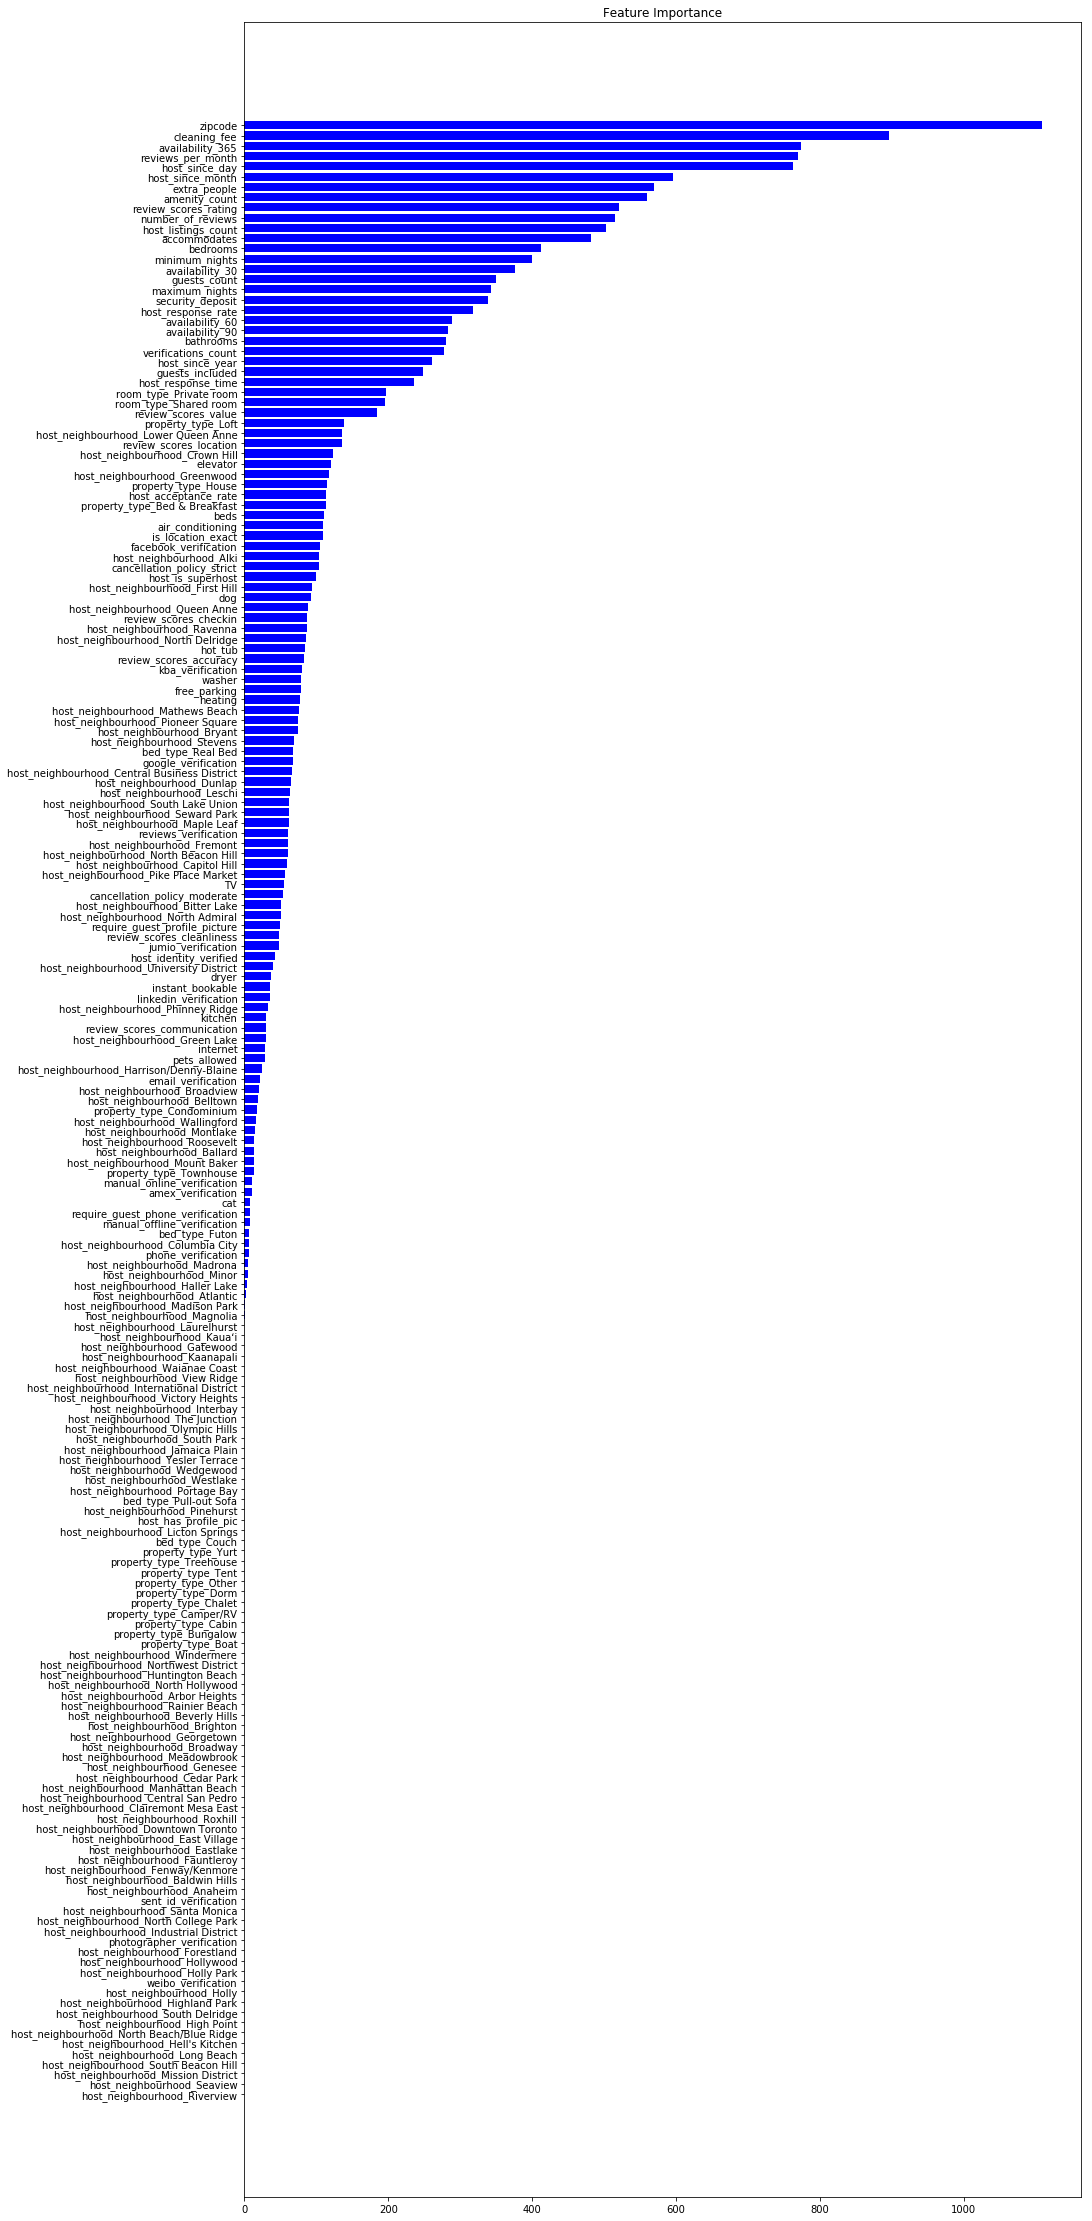

In [16]:
features = X_train.columns
importances = lgbr.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15, 40))
plt.title('Feature Importance')
plt.barh(features[indices], importances[indices], color='b')  
plt.show()

#### Analyzing the data

#### Conclusion:
Zipcode is the most important feature in price predict, which means that location of listings influence the price most. What's more, cleaning fee, available time, reviews bedrooms also important features which can obviously influence the price of listings.